In [21]:
!pip install word2number
import pandas as pd
import numpy as np 
from sklearn import linear_model
import matplotlib.pyplot as plt
from word2number import w2n

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [22]:
df = pd.read_csv('hiring.csv')
df

,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,NaN,8.0,9,50000
1,NaN,8.0,6,45000
2,five,6.0,7,60000
3,two,10.0,10,65000
4,seven,9.0,6,70000
5,three,7.0,10,62000
6,ten,NaN,7,72000
7,eleven,7.0,8,80000


In [23]:
df = df.rename(columns={
    'test_score(out of 10)':'test_score',
    'interview_score(out of 10)':'interview_score',
    'salary($)':'salary'
                        })
df

,experience,test_score,interview_score,salary
0,NaN,8.0,9,50000
1,NaN,8.0,6,45000
2,five,6.0,7,60000
3,two,10.0,10,65000
4,seven,9.0,6,70000
5,three,7.0,10,62000
6,ten,NaN,7,72000
7,eleven,7.0,8,80000


In [24]:
test_median = df.test_score.median()
test_median

8.0

In [25]:
df =df.fillna({
    'experience':0,
    'test_score':test_median
})
df

,experience,test_score,interview_score,salary
0,0,8.0,9,50000
1,0,8.0,6,45000
2,five,6.0,7,60000
3,two,10.0,10,65000
4,seven,9.0,6,70000
5,three,7.0,10,62000
6,ten,8.0,7,72000
7,eleven,7.0,8,80000


In [26]:
newList = []
for i in df.experience:
  if i!=0:
    newList.append(w2n.word_to_num(i))
  else :
    newList.append(0)
newList

[0, 0, 5, 2, 7, 3, 10, 11]

In [27]:
newExp = np.array(newList)
newExp

array([ 0,  0,  5,  2,  7,  3, 10, 11])

In [28]:
df['experience']=newExp
df

,experience,test_score,interview_score,salary
0,0,8.0,9,50000
1,0,8.0,6,45000
2,5,6.0,7,60000
3,2,10.0,10,65000
4,7,9.0,6,70000
5,3,7.0,10,62000
6,10,8.0,7,72000
7,11,7.0,8,80000


In [29]:
reg=linear_model.LinearRegression()
reg.fit(df.drop('salary',axis='columns'),df.salary)

LinearRegression()

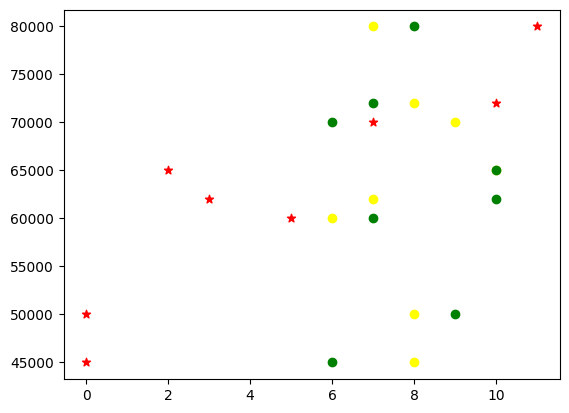

In [37]:
%matplotlib inline
plt.scatter(df['experience'],df.salary,color='red',marker='*')
plt.scatter(df['test_score'],df.salary,color='yellow')
plt.scatter(df['interview_score'],df.salary,color='green')


In [40]:
y_pred = reg.predict(df[['experience','test_score','interview_score']])
y_pred

array([52350.0727802 , 45734.35225619, 58312.95487627, 63872.63464338,
       67270.74235808, 61148.47161572, 76069.1411936 , 79241.63027656])

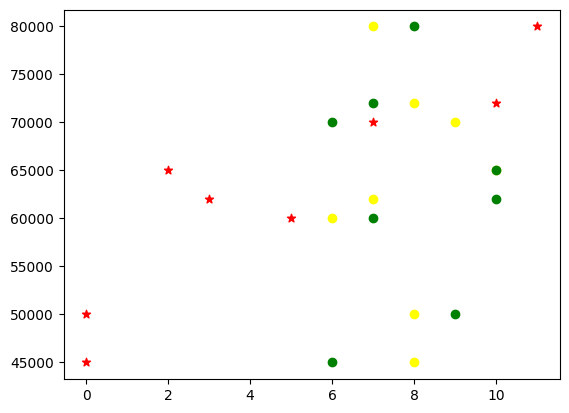

In [44]:
plt.scatter(df['experience'],df.salary,color='red',marker='*')
plt.scatter(df['test_score'],df.salary,color='yellow')
plt.scatter(df['interview_score'],df.salary,color='green')


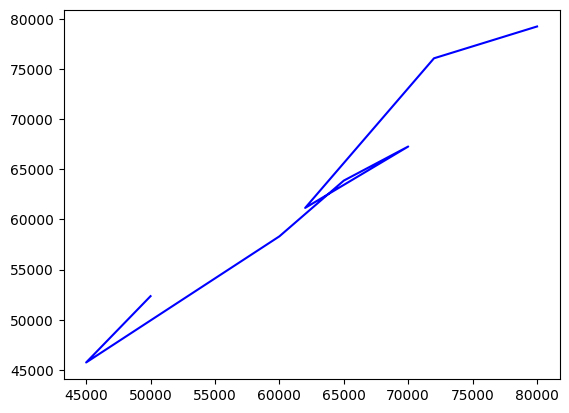

In [47]:
plt.plot(df.salary,y_pred,color='blue')

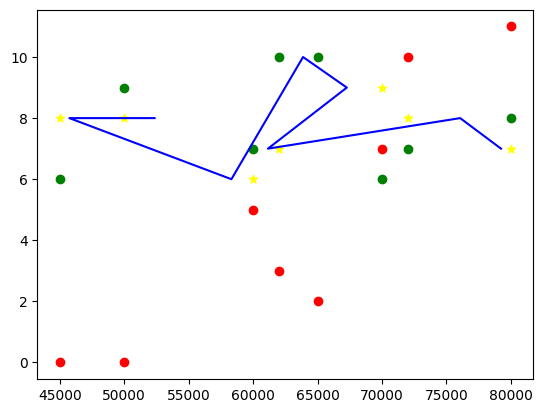

In [57]:
plt.plot(y_pred,df['test_score'],color='blue')
plt.scatter(df.salary,df['experience'],color='red')
plt.scatter(df.salary,df['test_score'],color='yellow',marker='*')
plt.scatter(df.salary,df['interview_score'],color='green')